<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Guided%20Project/%20Logistic_Regression_with_NumPy(univariate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project-Based Course Overview

Course Name: [Logistic Regression with Numpy and Python](https://www.coursera.org/learn/linear-regression-numpy-python)

Instructors: Snehan Kekre

This is a project-based course which takes approximately 1.5 hrs to finish.


## Course Objectives
In this course, we are going to focus on three learning objectives:

1. Implement the gradient descent algorithm from scratch.
2. Perform logistic regression with NumPy and Python.
3. Create data visualizations with Matplotlib and Seaborn

By the end of this course, you will be able to build logistic regression models from scratch using NumPy and Python, without the use of machine learning frameworks such as scikit-learn and statsmodels.

# Task 1: Introduction and Project Overview
* Introduction to the data set and the problem overview.
* See a demo of the final product you will build by the end of this project.
* Introduction to the Rhyme interface.
* Import essential modules and helper functions from NumPy and Matplotlib.

# Task 2: Load the Data and Import Libraries
* Load the dataset using pandas.
* Explore the pandas dataframe using the head() and info() functions..

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
plt.style.use('ggplot')
%matplotlib inline

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [6]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MC_Colab/Data/bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


#Task 3: Visualize the Data
* Before starting on any task, it is often useful to understand the data by visualizing it.
* For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: scores for test 1, scores for test 2.

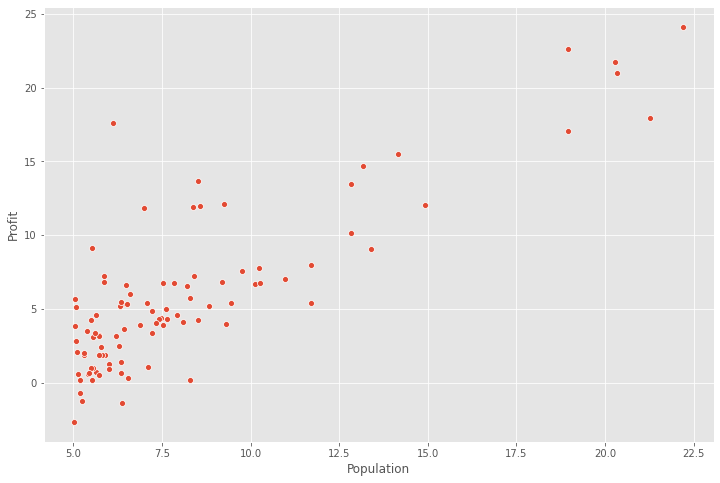

In [8]:
ax = sns.scatterplot(x= "Population", y = "Profit", data = data)                  
plt.show();
ax.set_title("Profit_in $10000s vs City Population in 10000s");

In [9]:
m = data.Population.values.size
X = np.append(np.ones((m,1)),data['Population'].values.reshape(m,1),axis =1)
y = data['Profit'].values.reshape(m,1)
theta_init = np.zeros((2,1))

# Task 4: Compute the Cost 𝐽(𝜃)
* Let’s now take a look at the machinery that powers linear regression: Gradient Descent. 
*We want to fit the linear regression parameters 𝜃 to our dataset using gradient descent.
* The objective of linear regression is to minimize the cost function J(𝜃).
* You can think of the cost as the error your model made in estimating a value.
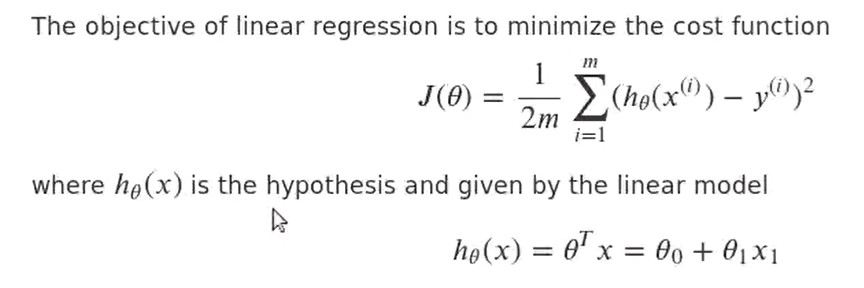

In [30]:
def cost_function(x,y,theta):
    m = x.shape[0]
    y_hat = np.dot(x, theta)
    error = np.square(y - y_hat)
    cost = 1 / (2 * m) * np.sum(error)
    return cost


In [74]:
theta_init = np.zeros((2,1))
cost =cost_function(X,y,theta_init)
print("Cost at initialization:", cost)

Cost at initialization: 32.072733877455676


#Task 5: Implement Gradient Descent from scratch in Python
* Recall that the parameters of our model are the 𝜃_j values.
* These are the values we will adjust to minimize the cost J(𝜃).
* One way to do this is to use the batch gradient descent algorithm.
* In batch gradient descent, each iteration performs the following update.
* With each step of gradient descent, the parameters 𝜃_j come closer to the optimal values that will achieve the lowest cost J(𝜃).


In [75]:
def gradient_descent(x, y, theta, learning_rate, iterations):
    m = x.shape[0]
    costs = np.zeros(iterations)
    for i in range(iterations):
        costs[i] = cost_function(x, y, theta)
        grad = np.dot(np.transpose(x), (np.dot(x, theta) - y))
        theta = theta - (learning_rate / m) * grad
      
    return theta, costs

In [76]:
theta,costs = gradient_descent(X,y,theta_init,learning_rate = 0.005, iterations =300)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                                str(round(theta[1,0],2))))

h(x) = -0.86 + 0.89x1


#Task 6: Plotting the Convergence
* Let’s plot how the cost function varies with the number of iterations.
* When we ran gradient descent previously, it returns the history of J(𝜃) values in a vector “costs”.
* We will now plot the J values against the number of iterations.



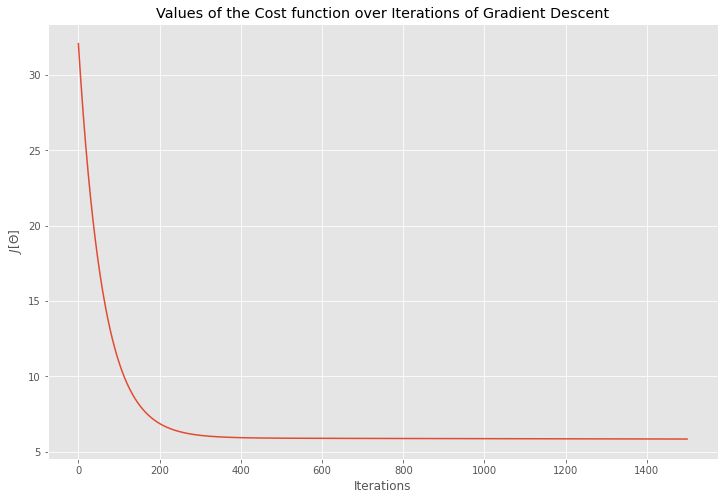

In [71]:
theta,costs = gradient_descent(X,y,theta_init,learning_rate = 1e-4, iterations = 1500)
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J[\Theta]$')
plt.title("Values of the Cost function over Iterations of Gradient Descent")
plt.show();

In [72]:
print("Theta after running gradients descent: ",theta)
print("Minimum cost: ",costs[-1])

Theta after running gradients descent:  [[-0.02632385]
 [ 0.80430136]]
Minimum cost:  5.840126397716065


# Task 7: Visualizing the Cost Function J(𝜃)
* To better understand the cost function J(𝜃), we will plot the cost over a 2-dimensional grid of 𝜃_0 and 𝜃_1 values.
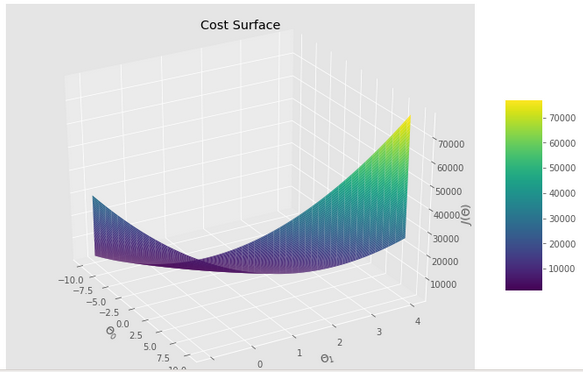

* The purpose of this graph is to show you how J(𝜃) varies with changes in 𝜃_0 and 𝜃_1.
* We can see that the cost function J(𝜃) is bowl-shaped and has a global minimum.

In [61]:
from mpl_toolkits.mplot3d import Axes3D

In [62]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)
cost_values = np.zeros((len(theta_0),len(theta_1)))
for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i],theta_1[j]])
    cost_values[i,j] = cost_function(X,y,t)


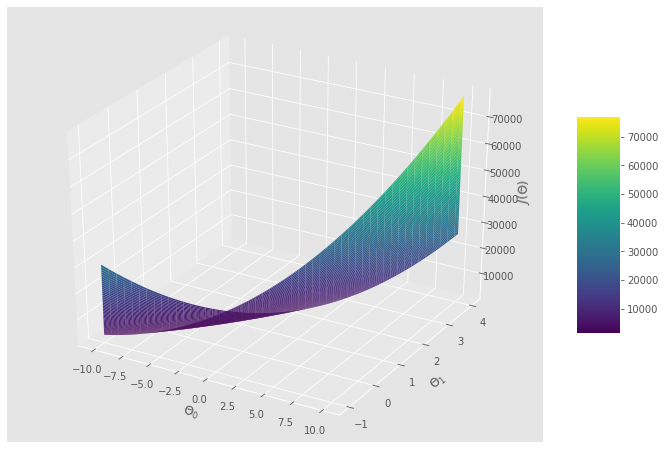

In [63]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values,cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
plt.show();

#Task 8: Training Data with Univariate Linear Regression Fit

* Now that we have correctly implemented and run gradient descent and arrived at the final parameters of our model, we can use these parameters to plot the linear fit. 

In [64]:
theta.shape

(2, 1)

In [65]:
theta

array([[-0.02632385],
       [ 0.80430136]])

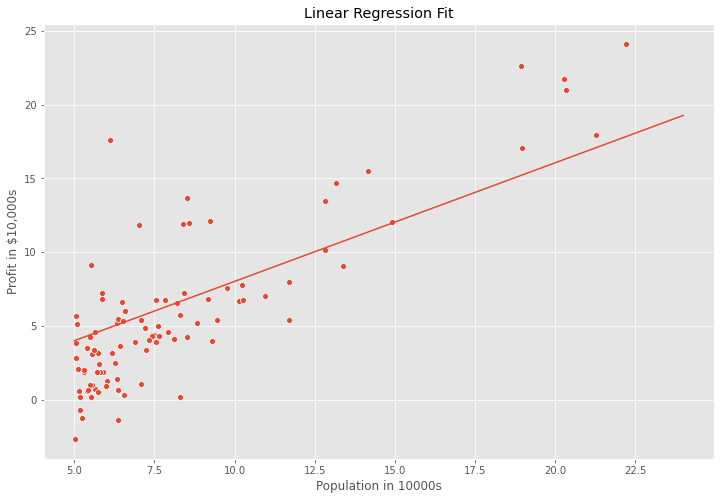

In [66]:
theta = np.squeeze(theta)
sns.scatterplot(x= "Population", y = "Profit", data = data) 
x_value = [x for x in range(5,25)]
y_value = [(x*theta[1]+theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

#Task 9: Inference using the optimized 𝜃 values

* In this final task, let’s use our final values for 𝜃 to make predictions on profits in cities of 35,000 and 70,000 people. 

In [67]:
def predict(x,theta):
  y_pred = np.dot(theta.transpose(),x)
  return y_pred


In [ ]:
y_pred_1 = predict(np.array([1,4]), theta)*10000
print("For a population of 40,000 people, the model predicts a profit of $ "+str(round(y_pred_1,0)))


In [ ]:
y_pred_2 = predict(np.array([1,8.3]), theta)*10000
print("For a population of 83,000 people, the model predicts a profit of $ "+str(round(y_pred_2,0)))